In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stat
df = pd.read_csv('Sales_add.csv')
df.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [25]:
df.isnull().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [26]:
df.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [ ]:
# que 1

In [41]:
before=df['Sales_before_digital_add(in $)'].values
after=df['Sales_After_digital_add(in $)'].values
t_test_stat,p_value=stat.ttest_rel(after,before,alternative='greater')
print(t_test_stat,p_value)

12.09070525287017 3.168333502287889e-11


In [ ]:
# p value is less than significance
# null hypothesis rejected
# the sales has increased after digital marketing

In [ ]:
# que 2

In [43]:
df.groupby(['Region','Manager']).size()

Region      Manager    
Region - A  Manager - A    4
            Manager - B    3
            Manager - C    3
Region - B  Manager - A    4
            Manager - B    1
            Manager - C    2
Region - C  Manager - A    1
            Manager - B    3
            Manager - C    1
dtype: int64

<AxesSubplot:xlabel='Region', ylabel='count'>

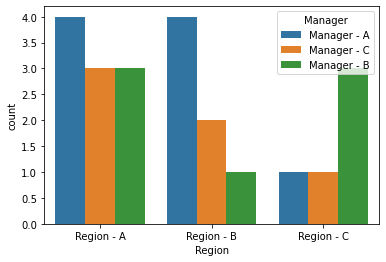

In [44]:
sns.countplot(x='Region',data=df,hue='Manager')

In [45]:
df['Region'].value_counts()

Region - A    10
Region - B     7
Region - C     5
Name: Region, dtype: int64

In [46]:
df['Manager'].value_counts()

Manager - A    9
Manager - B    7
Manager - C    6
Name: Manager, dtype: int64

In [51]:
table=pd.crosstab(df['Manager'],df['Region'])
table

Region,Region - A,Region - B,Region - C
Manager,,,
Manager - A,4,4,1
Manager - B,3,1,3
Manager - C,3,2,1


In [53]:
chi,p_val,data,exp=stat.chi2_contingency(table)
print(chi)
print(p_val)
print(exp)

3.050566893424036
0.5493991051158094
[[4.09090909 2.86363636 2.04545455]
 [3.18181818 2.22727273 1.59090909]
 [2.72727273 1.90909091 1.36363636]]


In [ ]:
# p value is not less than level of significance
# null hypothesis is accepted
# no dependence between region and manager